# Clustering & Réduction de la dimensionnalité

Chargez la base de données MNIST depuis le module scikit-learn
Transformez le type des labels de string en uint8 en utilisant la fonction astype

In [126]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import MiniBatchKMeans
import numpy as np

In [118]:
mnist = fetch_openml('mnist_784', version=1)

In [119]:
X = mnist.data
y = mnist.target

In [120]:
y.astype(np.uint8)

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

## 1- Clustering

### 1. Créez un code qui partitionne les données en base d’apprentissage (60000) et base de test (10000).

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.14285)
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


### 2. Créez une figure avec des sous-graphiques 3x3 en utilisant matplotlib.pyplot. 
Parcourir
les sous-graphiques et ajouter les 9 premières images mnist en utilisant matshow() et
Afficher le graphique.

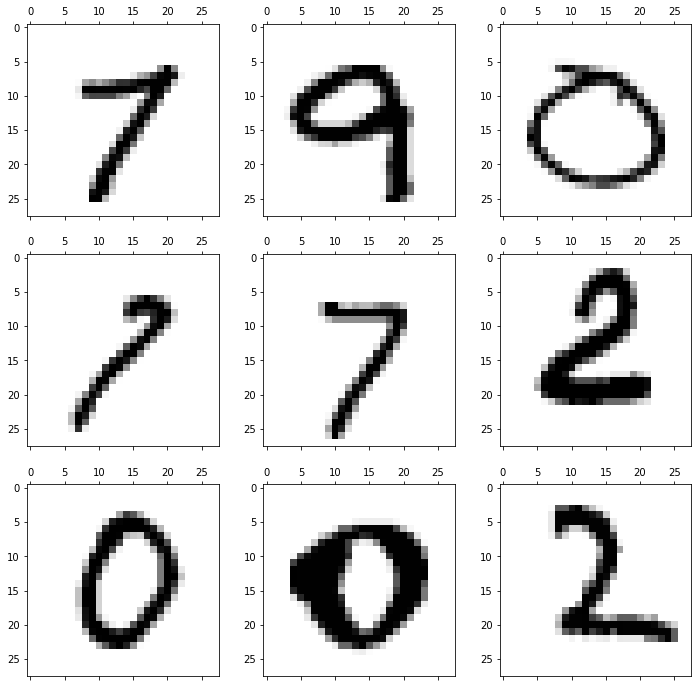

In [122]:
fig, axs = plt.subplots(3, 3, figsize = (12, 12))

for i, ax in enumerate(axs.flat):
    ax.matshow(X_train[i].reshape(28,28), cmap=plt.cm.binary)

plt.show()

### 3. Les algorithmes de clustering utilisent presque toujours des données unidimensionnelles.
Par exemple, si vous regroupiez un ensemble de coordonnées X, Y, chaque point serait
passé à l'algorithme de clustering sous la forme d'un vecteur à une dimension d'une
longueur de deux (exemple: [2,4] ou [-1, 4] ). MNIST contient des images de taille 28x28
pixels; en conséquence, ils auront une longueur de 784 une fois que nous les
transformons en un vecteur à une seule dimension. Convertissez chaque image dans les
données d’apprentissage en un vecteur d’une seule dimension, normalisez ces données
dans un intervalle entre 0 et 1.

In [123]:
X_train, X_test = X_train/255, X_test/255

### 4. Il est temps de commencer le clustering! 
En raison de la taille du jeu de données MNIST,
nous utiliserons l'implémentation mini-batch du clustering k-means fourni par scikit-learn.
Cela réduira considérablement le temps nécessaire pour adapter l'algorithme aux
données. Créez un code qui permet de faire l’apprentissage sur les données
d’entraînement normalisées en utilisant l’objet MiniBatchKMeans du sous module cluster
de scikit-learn. Pour le paramètre n_clusters sa valeur est le nombre de classe dans le
jeu de données.

In [124]:
model = MiniBatchKMeans(n_clusters=10)
model.fit(X_train)
y_pred = model.predict(X)

### 5. Le K-means est une méthode d'apprentissage automatique non supervisée; 
par
conséquent, les étiquettes attribuées par notre algorithme KMeans font référence au
cluster auquel chaque vecteur a été assigné, et non à l'entier cible réel. Pour résoudre ce
problème, définissons quelques fonctions qui prédiront quel entier correspond à chaque
cluster :

a- Définissez une fonction qui associe le label le plus probable à chaque cluster dans
le modèle KMeans et qui renvoie un dictionnaire des clusters assignés à chaque
label.

In [125]:
def attrib_labels(model, y):
    dico = {}

    for i in range(model.n_clusters):

        # trouver les index
        labels = []
        index = np.where(model.labels_ == i)

        # rajouter les labels de chaque point du cluster
        labels.append(y[index])

        # chercher le label le plus courant
        if len(labels[0]) == 1:
            compte = np.bincount(labels[0])
        else:
            compte = np.bincount(np.squeeze(labels))

        # assigner les clusters à une valeur du dictionnaire
        if np.argmax(compte) in dico:
            # ajouter le nouveau numéro au array
            dico[np.argmax(compte)].append(i)
        else:
            # créer un nouvel array
            dico[np.argmax(compte)] = [i]

    return dico

def labels_data(X_labels, cluster_labels):
  # array vide de longueur: len(X)
    pred_label = np.zeros(len(X_labels)).astype(np.uint8)

    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                pred_label[i] = key

    return pred_label

# lancer les fonctions
cluster_labels = attrib_labels(model, y_train)
X_clusters = model.predict(X_train)
predicted_labels = labels_data(X_clusters, cluster_labels)
print (predicted_labels[:20])
print (y[:20])

TypeError: Cannot cast array data from dtype('O') to dtype('int64') according to the rule 'safe'

In [101]:
def attrib_label(modele):
    dico ={}
    labels = []
    for i in range(10): #10 clusters car 10 labels
        j = np.where(modele.labels_ == i) #lignes où le numéro de cluster est égal à i
        labels.append(y_train[j]) #ajouter à cette liste les vrais chiffres correspondant à ces lignes
        print(">>>>", y_train[j])
        print(">", labels[0])
  #      if len(labels[0]) == 1:
   #         compteur = np.bincount(labels[0])
    #        print(compteur)
     #   else:
        reduit = np.squeeze(labels)
        print(reduit)
        compteur = np.bincount(reduit)
        if np.argmax(compteur) in dico:
            dico[np.argmax(compteur)].append(i)
        else:
            dico[np.argmax(compteur)] = [i]
            
    return dico

In [102]:
attrib_label(model)

>>>> ['3' '3' '2' ... '3' '5' '3']
> ['3' '3' '2' ... '3' '5' '3']
['3' '3' '2' ... '3' '5' '3']


TypeError: Cannot cast array data from dtype('O') to dtype('int64') according to the rule 'safe'

b- Définissez une fonction qui détermine le label de chaque vecteur, en fonction du
cluster auquel il a été affecté et qui renvoie les labels prédites pour chaque
vecteur.

### 6. Avec les fonctions définies ci-dessus, nous pouvons maintenant déterminer la précision de nos algorithmes. 
Puisque nous utilisons cet algorithme de clustering pour la
classification, la précision est finalement la métrique la plus importante; cependant, il
existe d'autres mesures qui peuvent être appliquées directement aux clusters euxmêmes,
quelles que soient les labels associés. Deux de ces métriques que nous
utiliserons sont l'inertie et l'homogénéité.

### 7. De plus, précédemment, nous avons fait l'hypothèse que K = 10 était le nombre approprié de clusters; 
cependant, ce n'est peut-être pas le cas. Ajustez l'algorithme de clustering Kmeans
avec plusieurs valeurs différentes de K (ex : [10, 16, 36, 64, 144, 256]), puis
évaluez les performances à l'aide de ces métriques.

https://github.com/xoraus/K-Means-Clustering-for-Imagery-Analysis/blob/master/KMeans%20Clustering%20for%20Imagery%20Analysis%20(Jupyter%20Notebook).ipynb